satellite launches vs debris accumulation
satellite and debris accumulation by countries
space debris distribution by sizes

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess SATCAT data
df = pd.read_csv('satcat.tsv', delimiter="\t")

# Convert dates and extract launch year
df['LDate'] = pd.to_datetime(df['LDate'], errors='coerce')
df['Launch_Year'] = df['LDate'].dt.year

<ipython-input-3-5a65093c4f52>:6: DtypeWarning: Columns (1,19,21,23,25,27,29,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('satcat.tsv', delimiter="\t")


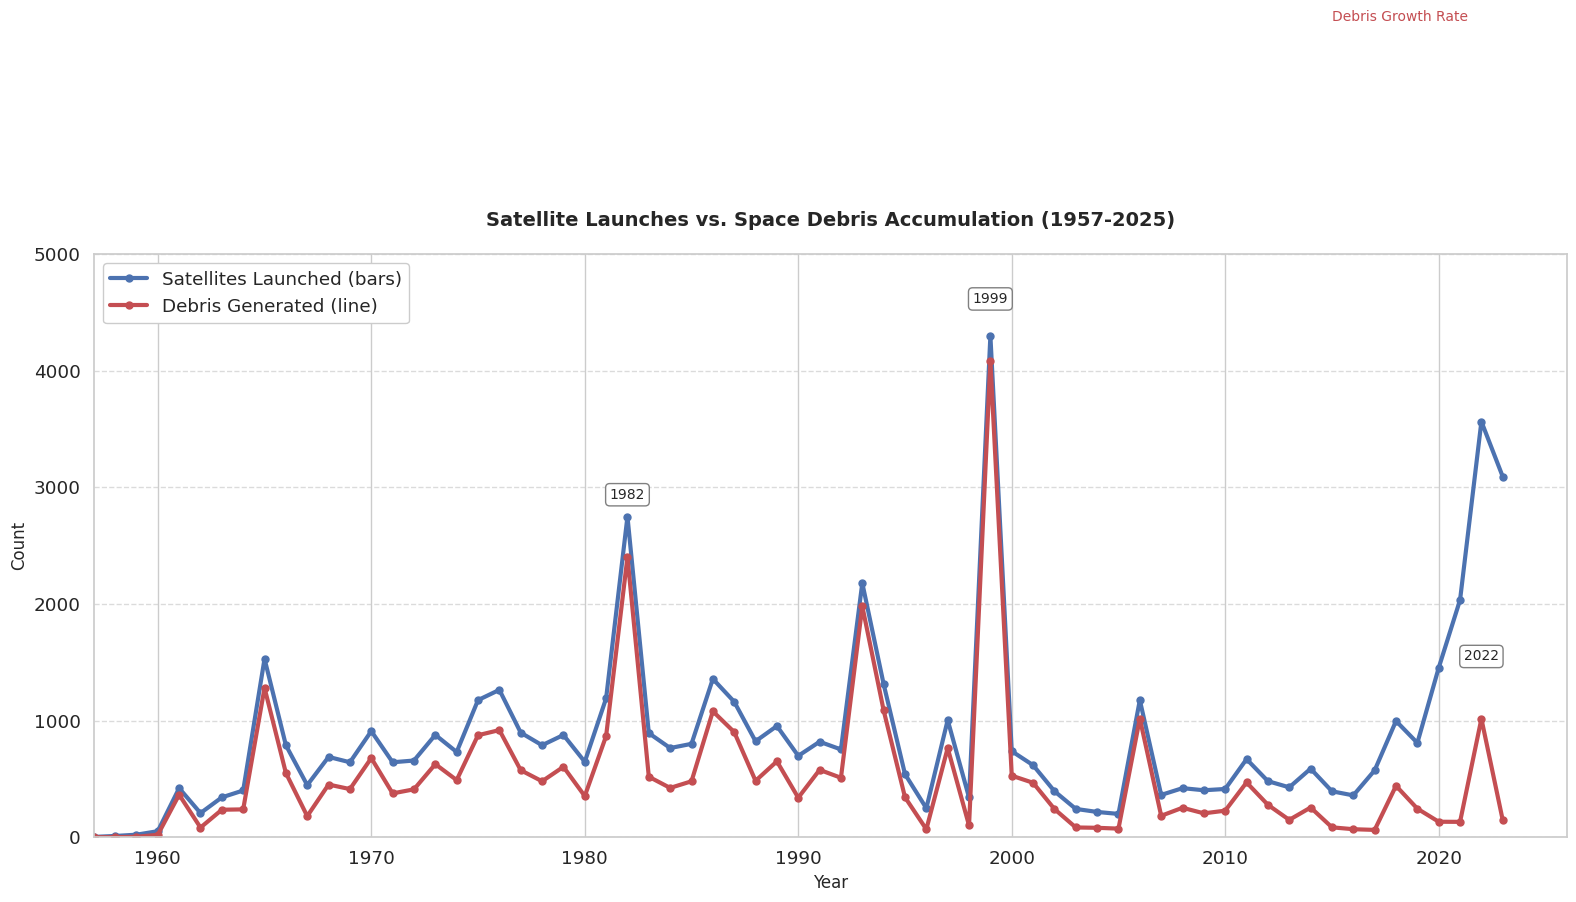

In [11]:

df["Mass"] = pd.to_numeric(df["Mass"], errors="coerce")
df['LDate'] = pd.to_datetime(df['LDate'], errors="coerce")
df['Year'] = df['LDate'].dt.year
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# satellites by year
satellites_per_year = df.groupby("Year")["Satcat"].count().reset_index(name="Satellite Count")

# Filter only debris objects (Type = 'D') and drop NaNs in Mass
df_debris = df[df["Type"].str.startswith(("D", "C"), na=False)].dropna(subset=["Mass"])

# Aggregate debris count per launch
debris_per_launch = df_debris.groupby("Launch_Tag").size().reset_index(name="Debris_Count")

# Aggregate debris count per year
debris_per_year = df_debris.groupby("Year")["Type"].count().reset_index(name="Debris Count")

merged = pd.merge(
    satellites_per_year,
    debris_per_year,
    on="Year",
    how="left"   # Keep all years from satellite data
).fillna(0)      # Fill missing debris values with 0

# Ensure integer type for plotting
merged["Debris Count"] = merged["Debris Count"].astype(int)

# Plotting values
years = merged["Year"]
launches = merged["Satellite Count"]
debris = merged["Debris Count"]

# Create figure
plt.figure(figsize=(16, 10), dpi=100)

# Plot launches (bars) and debris (line) on same y-axis
ax = plt.gca()
#bars = ax.bar(years, launches, color='#4C72B0', alpha=0.7, label='Satellites Launched')
bars = ax.plot(years, launches, color='#4C72B0', linewidth=3, marker='o', markersize=5, label='Satellites Launched')

line = ax.plot(years, debris, color='#C44E52', linewidth=3, marker='o', markersize=5, label='Debris Generated')

# Highlight key years
highlight_years = [1982, 1999, 2022, 2024]
for year in highlight_years:
    if year in years.values:
        idx = years.tolist().index(year)
        ax.annotate(f'{year}',
                    xy=(year, debris.iloc[idx] + 500),
                    ha='center',
                    fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1))

# Add trend arrows
ax.annotate('', xy=(2020, 15000), xytext=(2015, 8000),
            arrowprops=dict(arrowstyle="->", color='#C44E52', lw=2))
ax.text(2015, 7000, 'Debris Growth Rate', color='#C44E52', fontsize=10)

# Style
ax.set_xlim(1957, 2026)
ax.set_ylim(0, 5000)

ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_title('Satellite Launches vs. Space Debris Accumulation (1957-2025)',
             fontsize=14, pad=20, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Custom legend
handles = [bars[0], line[0]]
labels = ['Satellites Launched (bars)', 'Debris Generated (line)']
ax.legend(handles, labels, loc='upper left', framealpha=1)

plt.tight_layout()
plt.savefig('satellite_debris_line_plot.png', dpi=300)
plt.show()


In [5]:
df['State'].unique()  #Extracting the state OrgCodes and mapping them to a country or organization name respectively
# A dictionary mapping all state OrgCodes to their respective countries/orgnanizations
orgcode_to_country = {
    "US": "United States",
    "SU": "Soviet Union",
    "RU": "Russia",
    "UK": "United Kingdom",
    "FR": "France",
    "F": "France",
    "CN": "China",
    "DE": "Germany",
    "D": "Germany (pre-unification)",
    "CA": "Canada",
    "AU": "Australia",
    "IN": "India",
    "J": "Japan",
    "KR": "South Korea",
    "IL": "Israel",
    "BR": "Brazil",
    "MX": "Mexico",
    "AR": "Argentina",
    "PK": "Pakistan",
    "SG": "Singapore",
    "TW": "Taiwan",
    "NL": "Netherlands",
    "E": "Spain",
    "IT": "Italy",
    "I": "Italy",
    "ID": "Indonesia",
    "CZ": "Czech Republic",
    "UA": "Ukraine",
    "MY": "Malaysia",
    "PH": "Philippines",
    "HK": "Hong Kong",
    "EG": "Egypt",
    "ZA": "South Africa",
    "NG": "Nigeria",
    "SA": "Saudi Arabia",
    "UAE": "United Arab Emirates",
    "IR": "Iran",
    "CO": "Colombia",
    "VE": "Venezuela",
    "CH": "Switzerland",
    "PL": "Poland",
    "RO": "Romania",
    "SE": "Sweden",
    "FI": "Finland",
    "IE": "Ireland",
    "HU": "Hungary",
    "BG": "Bulgaria",
    "GR": "Greece",
    "PT": "Portugal",
    "NZ": "New Zealand",
    "AT": "Austria",
    "BE": "Belgium",
    "SK": "Slovakia",
    "SI": "Slovenia",
    "LT": "Lithuania",
    "LV": "Latvia",
    "EE": "Estonia",
    "KZ": "Kazakhstan",
    "AZ": "Azerbaijan",
    "BY": "Belarus",
    "KP": "North Korea",
    "AM": "Armenia",
    "MD": "Moldova",
    "GH": "Ghana",
    "ET": "Ethiopia",
    "KE": "Kenya",
    "SD": "Sudan",
    "DZ": "Algeria",
    "MA": "Morocco",
    "TN": "Tunisia",
    "RW": "Rwanda",
    "UG": "Uganda",
    "ZW": "Zimbabwe",
    "PE": "Peru",
    "CL": "Chile",
    "BO": "Bolivia",
    "UY": "Uruguay",
    "EC": "Ecuador",
    "QA": "Qatar",
    "SN": "Senegal",
    "DJ": "Djibouti",
    "OM": "Oman",
    "HR": "Croatia",
    "MC": "Monaco",
    "LA": "Laos",
    "PR": "Puerto Rico",
    "BT": "Bhutan",
    "NP": "Nepal",
    "LK": "Sri Lanka",
    "BD": "Bangladesh",
    "MN": "Mongolia",
    "PG": "Papua New Guinea",
    "BGN": "Bulgaria (uncertain format)",
    "HKUK": "Hong Kong / United Kingdom",
    "T": "Thailand",
    "B": "Belgium",
    "I-ESA": "European Space Agency",
    "I-EUM": "EUMETSAT (Europe)",
    "I-NATO": "NATO",
    "I-ESRO": "ESRO (European Space Research Org)",
    "I-ARAB": "ARABSAT",
    "I-INM": "INMARSAT",
    "I-RASC": "RASC (likely Russia/Asia)",
    "I-EU": "European Union",
    "I-EUT": "EUTELSAT",
    "I-INT": "International",
}
df['Country/Organization'] = df['State'].map(orgcode_to_country)
df_debris['Country/Organization'] = df_debris['State'].map(orgcode_to_country)
df_debris = df_debris.dropna(subset=['Country/Organization'])

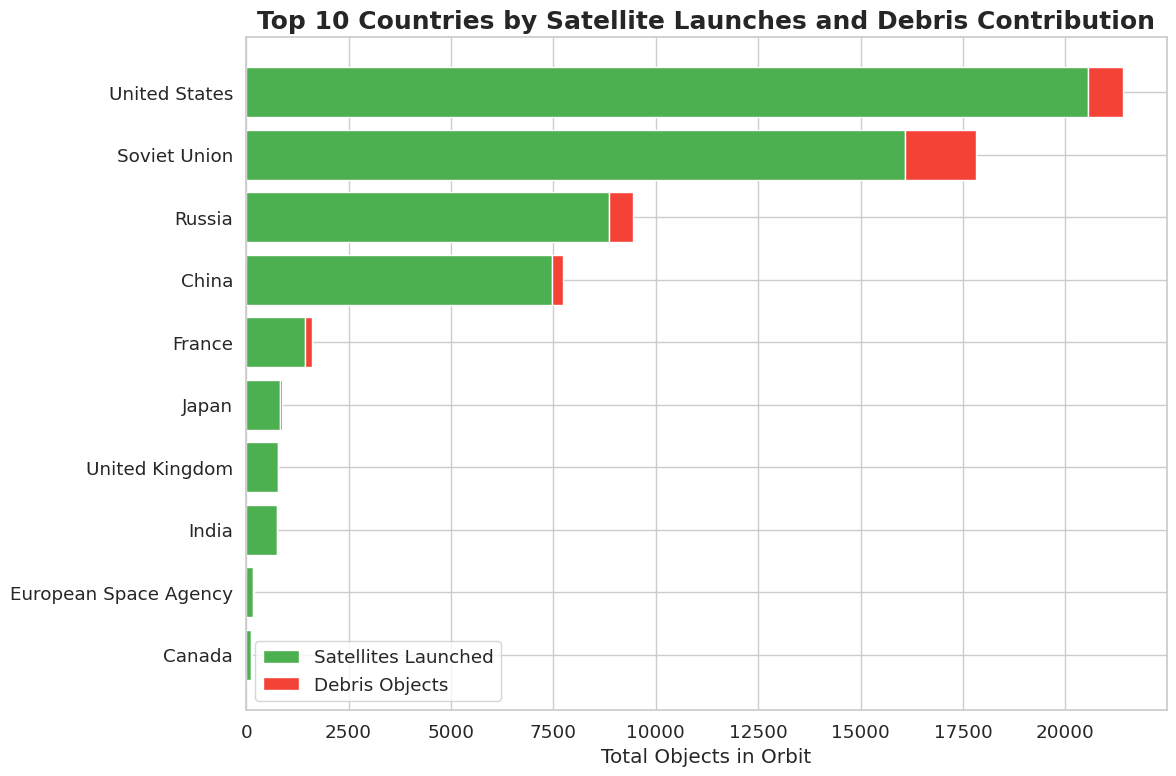

In [8]:
# Count satellite launches by country
launches_by_country = df.groupby('Country/Organization')['Satcat'].count().reset_index(name='Satellites Launched')

# Count debris by country
debris_by_country = df_debris.groupby('Country/Organization')['Satcat'].count().reset_index(name='Debris Count')

# Merge both counts
country_summary = pd.merge(
    launches_by_country,
    debris_by_country,
    on='Country/Organization',
    how='outer'
).fillna(0)

# Convert to integer
country_summary['Satellites Launched'] = country_summary['Satellites Launched'].astype(int)
country_summary['Debris Count'] = country_summary['Debris Count'].astype(int)

# Calculate total activity
country_summary['Total Objects'] = country_summary['Satellites Launched'] + country_summary['Debris Count']

# Sort and select top 10
top10 = country_summary.sort_values(by='Total Objects', ascending=False).head(10)


# Plot
plt.figure(figsize=(12, 8))
countries = top10['Country/Organization']
launches = top10['Satellites Launched']
debris = top10['Debris Count']

bar1 = plt.barh(countries, launches, color='#4CAF50', label='Satellites Launched')
bar2 = plt.barh(countries, debris, left=launches, color='#F44336', label='Debris Objects')

plt.xlabel('Total Objects in Orbit')
plt.title('Top 10 Countries by Satellite Launches and Debris Contribution', fontweight='bold', fontsize=18)
plt.legend()
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.savefig('top_10_countries.png', dpi=300)
plt.show()


<ipython-input-12-7afe10254b02>:34: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-7afe10254b02>:35: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  plt.savefig('fancy_debris_mass_violin.png', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


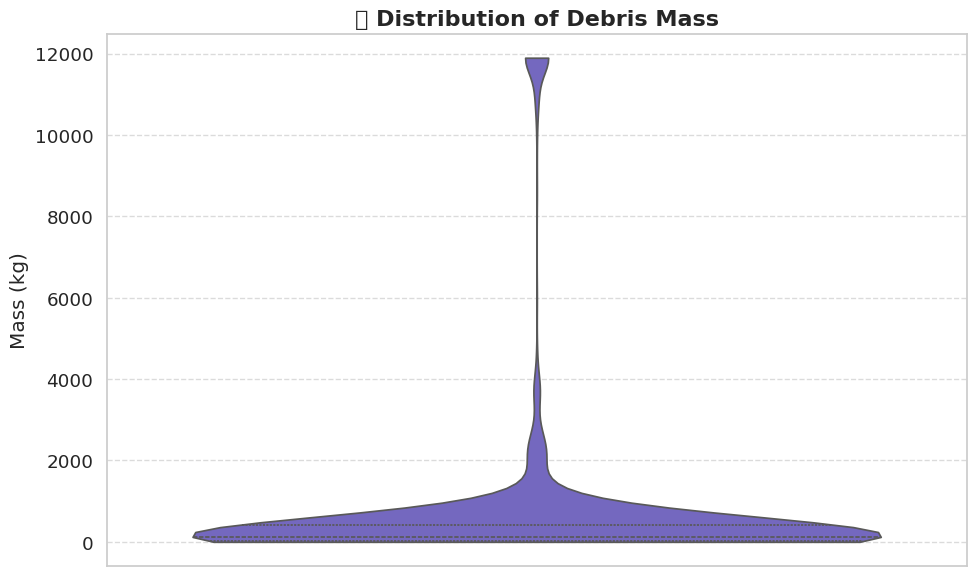

In [12]:
import seaborn as sns


sns.set(style="whitegrid", palette="pastel", font_scale=1.2)


df['Mass'] = pd.to_numeric(df['Mass'], errors='coerce')


df_debris = df[df['Type'].str.startswith(('D', 'C'), na=False)].copy()


df_debris = df_debris.dropna(subset=['Mass'])
df_debris = df_debris[df_debris['Mass'] > 0]


cap = df_debris['Mass'].quantile(0.99)
df_debris['CappedMass'] = df_debris['Mass'].clip(upper=cap)


plt.figure(figsize=(10, 6))
sns.violinplot(
    y='CappedMass',
    data=df_debris,
    inner='quartile',
    color="#6A5ACD",
    cut=0
)

plt.title('🛰️ Distribution of Debris Mass', fontsize=16, weight='bold')
plt.ylabel('Mass (kg)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('fancy_debris_mass_violin.png', dpi=300)
plt.show()
